In [13]:
import numpy as np
import cv2
import rospkg
import rospy
import matplotlib.pyplot as plt

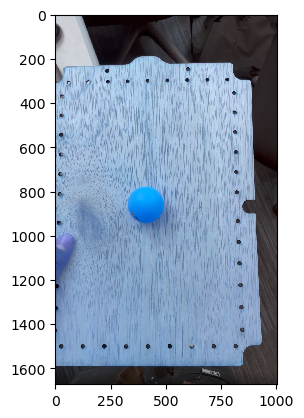

In [14]:
image = cv2.imread('../image/ball_lab_pic.png')
plt.imshow(image)

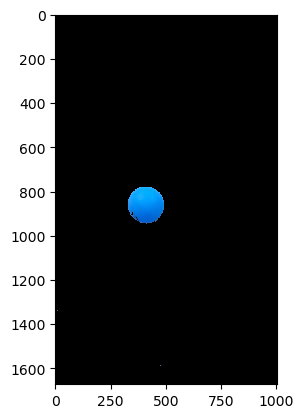

In [15]:
## Read
image = cv2.imread("../image/ball_lab_pic.png")

## convert to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## mask of orange 
mask = cv2.inRange(hsv, (10, 150, 150), (30, 255,255))

## slice the orange
imask = mask>0
orange = np.zeros_like(image, np.uint8)
orange[imask] = image[imask]

plt.imshow(orange)

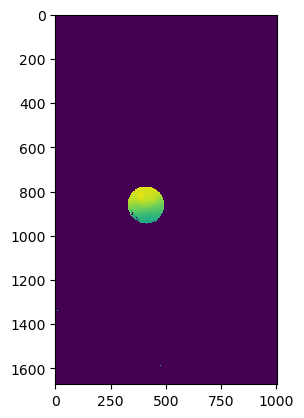

In [10]:
gray = cv2.cvtColor(orange, cv2.COLOR_BGR2GRAY)
#TODO: Add threshold to make ball stand out
#TODO: if not working try YOLO CNN
rows = gray.shape[0]
plt.imshow(gray)

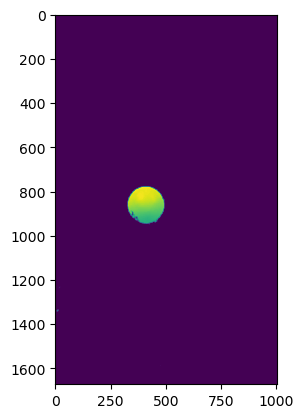

In [11]:
blur = cv2.GaussianBlur(gray, (7, 7), cv2.BORDER_DEFAULT)
plt.imshow(blur)

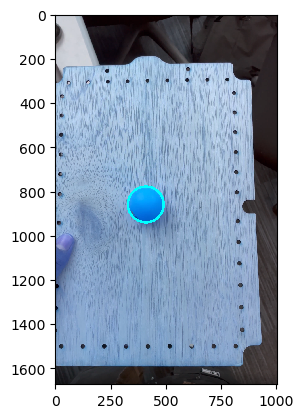

In [12]:
hough = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=40, param2=30, minRadius=30, maxRadius=120)
if hough is not None:
    hough = np.round(hough[0,:]).astype('int')
    for cx, cy, radius in hough:
        cv2.circle(image, (cx, cy), (int)(radius), (0,255,255), 10)
plt.imshow(image)